<a href="https://colab.research.google.com/github/madhura-kansara-sf/face_recognition/blob/main/FACE_RECOGNITION_USING_FACENET%2CMTCNN%2CSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mtcnn

In [ ]:
import cv2 as cv
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

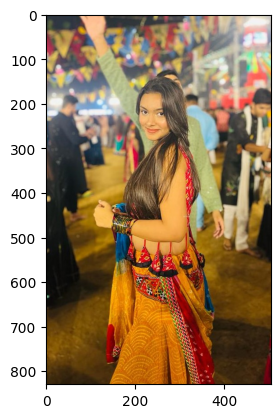

In [ ]:
img = cv.imread('/content/dataset/madhura/madhura2 copy.jpg')
#opencv readsnin bgr channel format
#plt reads in rgb format

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img) #rgb

In [ ]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(img)

1/1 [==============================] - 0s 164ms/step


In [ ]:
results
#box represents the corners of the face

[{'box': [208, 176, 77, 106],
  'confidence': 0.9983738660812378,
  'keypoints': {'left_eye': (222, 219),
   'right_eye': (259, 224),
   'nose': (233, 246),
   'mouth_left': (222, 256),
   'mouth_right': (255, 259)}}]

In [ ]:
x,y,w,h = results[0]['box']


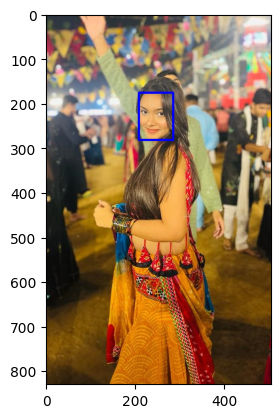

In [ ]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255) ,3)
plt.imshow(img)

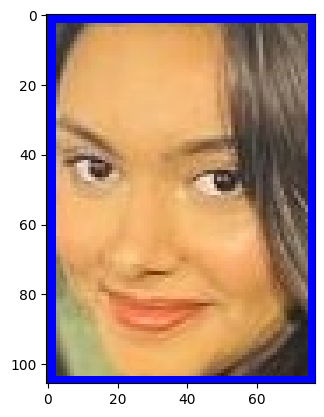

In [ ]:
#to take only the face part

my_face = img[y:y+h, x:x+w]
plt.imshow(my_face)

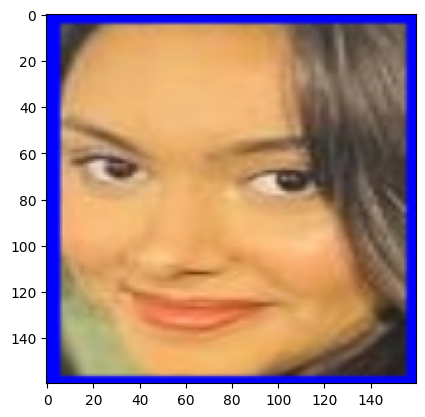

In [ ]:
#resize the img

#FACENET TAKES IMG AS INPUT 160X160
my_face = cv.resize(my_face,(160,160))
plt.imshow(my_face)

In [ ]:
my_face


array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

In [ ]:
#AUTOMATE THE PREPROCESSING

In [ ]:
class FACELOADING:
  def __init__(self,directory):
    self.directory = directory
    self.target_size = (160,160)
    self.X = [] #extracted face images
    self.Y = [] #labels
    self.detector = MTCNN()

  def extract_face(self, filename):
    img = cv.imread(filename)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    x,y,w,h = self.detector.detect_faces(img)[0]['box']
    x,y = abs(x),abs(y)
    face= img[y:y+h,x:x+w]
    face_arr = cv.resize(face, self.target_size)
    return face_arr

  def load_faces(self,dir):
    FACES=[]
    for im_name in os.listdir(dir):
      try:
        path = dir + im_name
        single_face = self.extract_face(path)
        FACES.append(single_face)
      except Exception as e:
        pass
    return FACES

  def load_classes(self):
    for sub_dir in os.listdir(self.directory):
      path = self.directory +'/'+sub_dir+'/'
      FACES = self.load_faces(path)
      labels = [sub_dir for _ in range(len(FACES))]
      print(f"loaded successfully: {len(labels)}")
      self.X.extend(FACES)
      self.Y.extend(labels)

    return np.asarray(self.X),np.asarray(self.Y)


  def plot_images(self):
   for num,image in enumerate(self.X):
     ncols=3
     nrows= len(self.Y)//ncols +1
     plt.subplot(nrows,ncols,num+1)
     plt.imshow(image)
     plt.axis('off')

In [ ]:
faceloading = FACELOADING("/content/dataset")
X,Y = faceloading.load_classes()

1/1 [==============================] - 0s 122ms/step
loaded successfully: 3
1/1 [==============================] - 0s 81ms/step
loaded successfully: 2
loaded successfully: 0
1/1 [==============================] - 0s 104ms/step
loaded successfully: 3


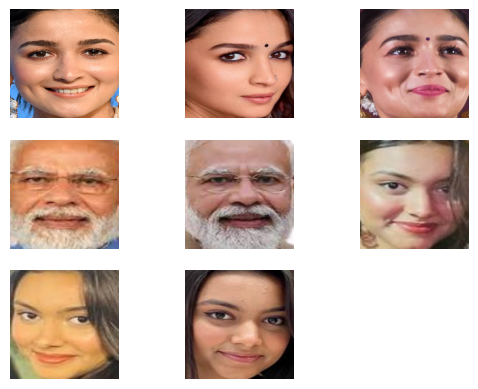

In [ ]:
faceloading.plot_images()

In [ ]:
#FACENET PARTTTT

In [ ]:
!pip install keras-facenet

In [ ]:
from keras_facenet import FaceNet

embedder = FaceNet()

def get_embedding(face_img):
  face_img = face_img.astype('float32') #3d(160x160x3) Convert the image to float32 data type
  face_img = np.expand_dims(face_img, axis=0)# Add a batch dimension
  #4d (Nonex160x160x3) bcoz tensorflow requires 4 dimention
  yhat= embedder.embeddings(face_img)# Generate embeddings for the face image
  return yhat[0] # Return the embeddings (assumes there's only one face in the image)

In [ ]:
EMBEDDED_X = [] # Initialize a list to store the embeddings

for img in X:
  EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 [==============================] - 0s 90ms/step


In [ ]:
np.savez_compressed('face_embeddings_done_4classes.npz',EMBEDDED_X,Y)

In [ ]:
# SVM MODEL

In [ ]:
Y

array(['alia', 'alia', 'alia', 'PM', 'PM', 'madhura', 'madhura',
       'madhura'], dtype='<U7')

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [ ]:
Y

array([1, 1, 1, 0, 0, 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True,random_state=42)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear',probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [ ]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [ ]:
ypreds_proba = model.predict_proba(X_test)
ypreds_proba

array([[0.18560245, 0.65422674, 0.16017082],
       [0.14082286, 0.13571158, 0.72346556]])

In [ ]:
X_test

array([[-0.02912093,  0.0316007 , -0.08254422, ..., -0.07801163,
        -0.00618638,  0.00542943],
       [-0.01278387, -0.06791762, -0.04783804, ..., -0.09358991,
        -0.0410432 ,  0.07140193]], dtype=float32)

In [ ]:
ypreds_test

array([1, 2])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, ypreds_train)

1.0

In [ ]:
accuracy_score(Y_test,ypreds_test)

1.0

In [ ]:
m_img = cv.imread("/content/madhura4 copy.jpg")
m_img = cv.cvtColor(m_img, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(m_img)[0]['box']

1/1 [==============================] - 0s 140ms/step


In [ ]:
m_img = m_img[y:y+h,x:x+w]
m_img = cv.resize(m_img, (160,160))
test_img = get_embedding(m_img)

1/1 [==============================] - 0s 97ms/step


In [ ]:
test_img.shape #lets add one more dim here

(512,)

In [ ]:
test_img = [test_img]
#test_img
ypreds = model.predict(test_img)
ypreds_proba = model.predict_proba(test_img)
ypreds_proba
# if np.array_equal(ypreds, Y_test):
#   #print(ypreds)
#     print(encoder.inverse_transform(ypreds))
# else :
#     print("Unknown image found")

array([[0.1414917 , 0.10299359, 0.75551472]])

In [ ]:
ypreds

array([2])

In [ ]:
predicted_class= encoder.inverse_transform(ypreds)

# unique_labels_train = np.unique(Y_train)

# if predicted_class not in unique_labels_train:
#     print("Unknown image found")
# else:
print(predicted_class)

['madhura']


In [ ]:
unique_labels_train = np.unique(Y_train)

# Check if the predicted class is not present in the unique labels from training data
if predicted_class[0] not in unique_labels_train:
    print("Unknown image found")

Unknown image found


<ipython-input-503-d3bf5356657d>:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if predicted_class[0] not in unique_labels_train:


In [ ]:
unique_labels_train

array([0, 1, 2])

In [ ]:
# CONCLUSION : MTCNN IS VERY SLOW FOR BIG DATASETS ..